In [1]:
%cd '/home/threadripper/PycharmProjects/plcoh'

/home/threadripper/PycharmProjects/plcoh


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from services.coherence_service import CoherenceService

In [3]:
mpl.rcParams['figure.dpi'] = 200
sns.set_style("whitegrid")
alpha=0.9

In [4]:
shuffled_coherence_service = CoherenceService(shuffled=True)
shuffled_coherence_service.load_from_cache()

In [5]:
attribute = 'num_edits'
feature = 'instrumentalness'

rows = []
for key, value in shuffled_coherence_service.data[[attribute, feature]].dropna().values:
    if key <= 1:
        continue
    rows.append((int(np.log2(key)), value))
boxy = pd.DataFrame(rows, columns=[attribute, feature])

/tmp/ipykernel_12712/1362288829.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([2**(i+1) for i in range(7)])


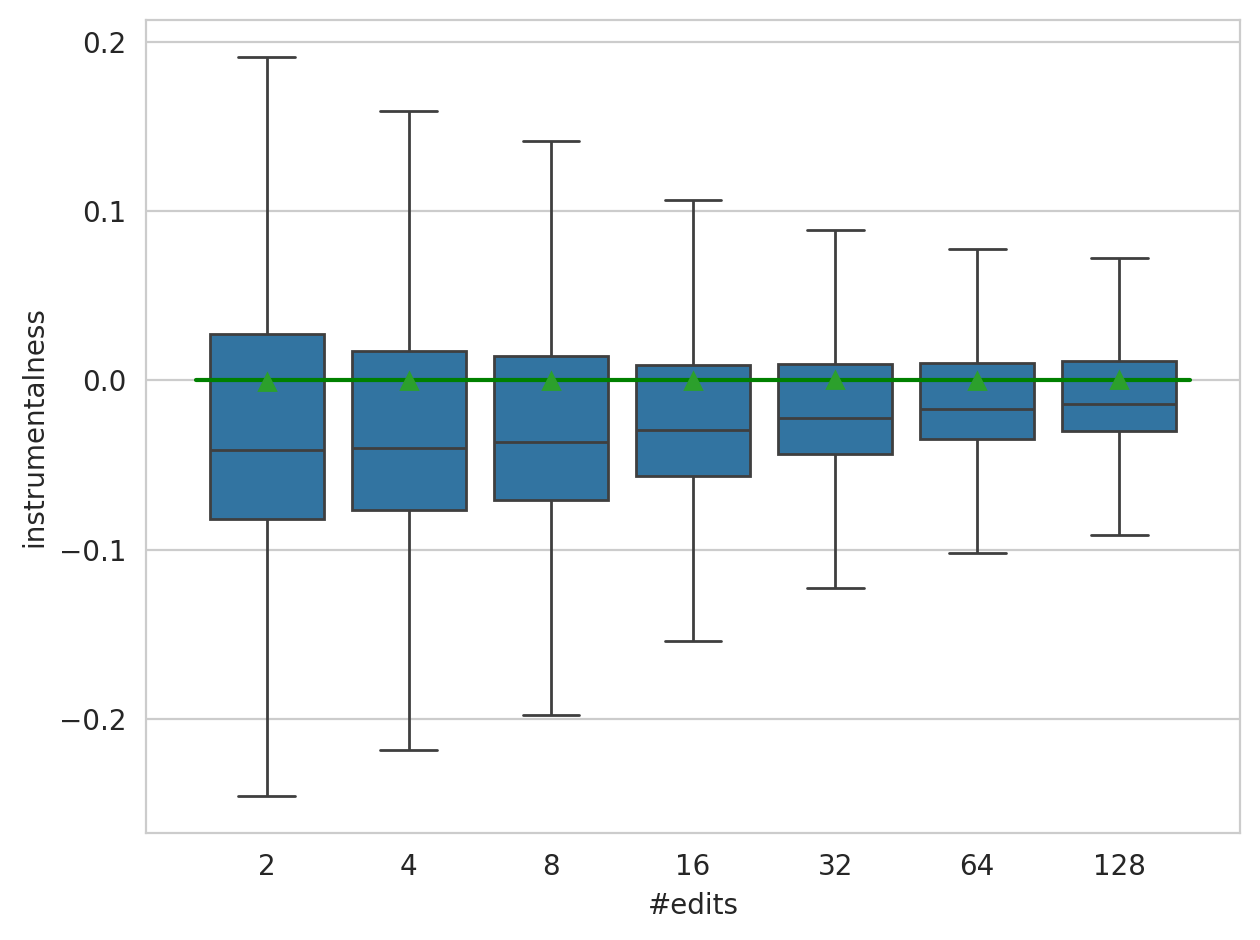

In [6]:
ax = sns.boxplot(boxy, x=attribute, y=feature, showmeans=True, showfliers=False)
ax.set_xlabel('#edits')
ax.set_xticklabels([2**(i+1) for i in range(7)])
plt.plot([-0.5, 6.5], [0, 0], color='green')
plt.tight_layout()
plt.savefig('plots/fig_length_influence_boxplot.png')
plt.show()